### Importando as bibliotecas necessárias

###### Pandas

É uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Oferece estruturas e operações para manipular tabelas numéricas e séries temporais.

###### Matplotlib

É uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para e da linguagem de programação Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Outputs

Precisamos armazenar nossos outputs. Como vamos lidar com diversos arquivos outputs, armazená-los em listas vai auxiliar a trabalhar com os dados. Além disso, no momento de plotar o gráfico, precisamos diferenciar as curvas com diferentes legendas. Por isso, vamos pedir as diferentes legendas logo após o output ser fornecido. 

In [2]:
outputosso = 'heterogeneo/osso.csv'
legendaosso = 'Simulador A'
outputpulmao = 'heterogeneo/pulmao.csv'
legendapulmao = 'Simulador B'

### Partícula

Para contruírmos o gráfico da forma mais legível é interessante tratarmos de forma diferente fótons e elétrons. Vamos deferenciar, por exemplo, quando limitamos os valores do eixo x.

In [3]:
particula = input('Digite f para fótons. Digite e para elétrons: ')

Digite f para fótons. Digite e para elétrons: f


### Tratando os dados do output

In [4]:
def output(x):                
    df = pd.read_csv(x,  sep = ';')  
    df['x'], df['y'], df['z'], df['Dose'] = df['# TOPAS Version: 3.7'].str.split(',', 4).str
    del df['# TOPAS Version: 3.7']

    df = df.iloc[7:]                           #Removendo as primeiras linhas que não contêm dado numérico

    df['x'] = df['x'].astype(int)              #Transfromando bins e dose em números
    df['y'] = df['y'].astype(int)
    df['z'] = df['z'].astype(int)
    df['Dose'] = df['Dose'].astype(float)

    return df

### Normalizando a dose

In [5]:
def normalizapulmao():    
    df['Dose'] = (df['Dose'] / df['Dose'].max()) #Normalizando a dose

    return dfosso

In [6]:
def normalizaosso():    
    df['Dose'] = (df['Dose'] / 1.313630377808295e-07) #Normalizando a dose

    return df

### Encontrando a mediana de acordo com o número de bins

In [7]:
def binspulmao():
    medianapulmao = int(df['x'].median())
    return medianapulmao

In [8]:
def binsosso():
    medianaosso = int(df['x'].median())
    return medianaosso

### Selecionando apenas as linhas com valores de 'x' e 'y' iguais a mediana

In [13]:
def dataframepulmao():        
    novodf = df.loc[df['x'] == medianapulmao]
    novodf2pulmao = novodf.loc[novodf['y'] == medianapulmao]

    return novodf2pulmao

In [14]:
def dataframeosso():        
    novodf = dfosso.loc[df['x'] == medianaosso]
    novodf2osso = novodf.loc[novodf['y'] == medianaosso]

    return novodf2osso

### Contruindo o gráfico

C:\Users\Larissa\AppData\Local\Temp/ipykernel_10088/1061929427.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['x'], df['y'], df['z'], df['Dose'] = df['# TOPAS Version: 3.7'].str.split(',', 4).str


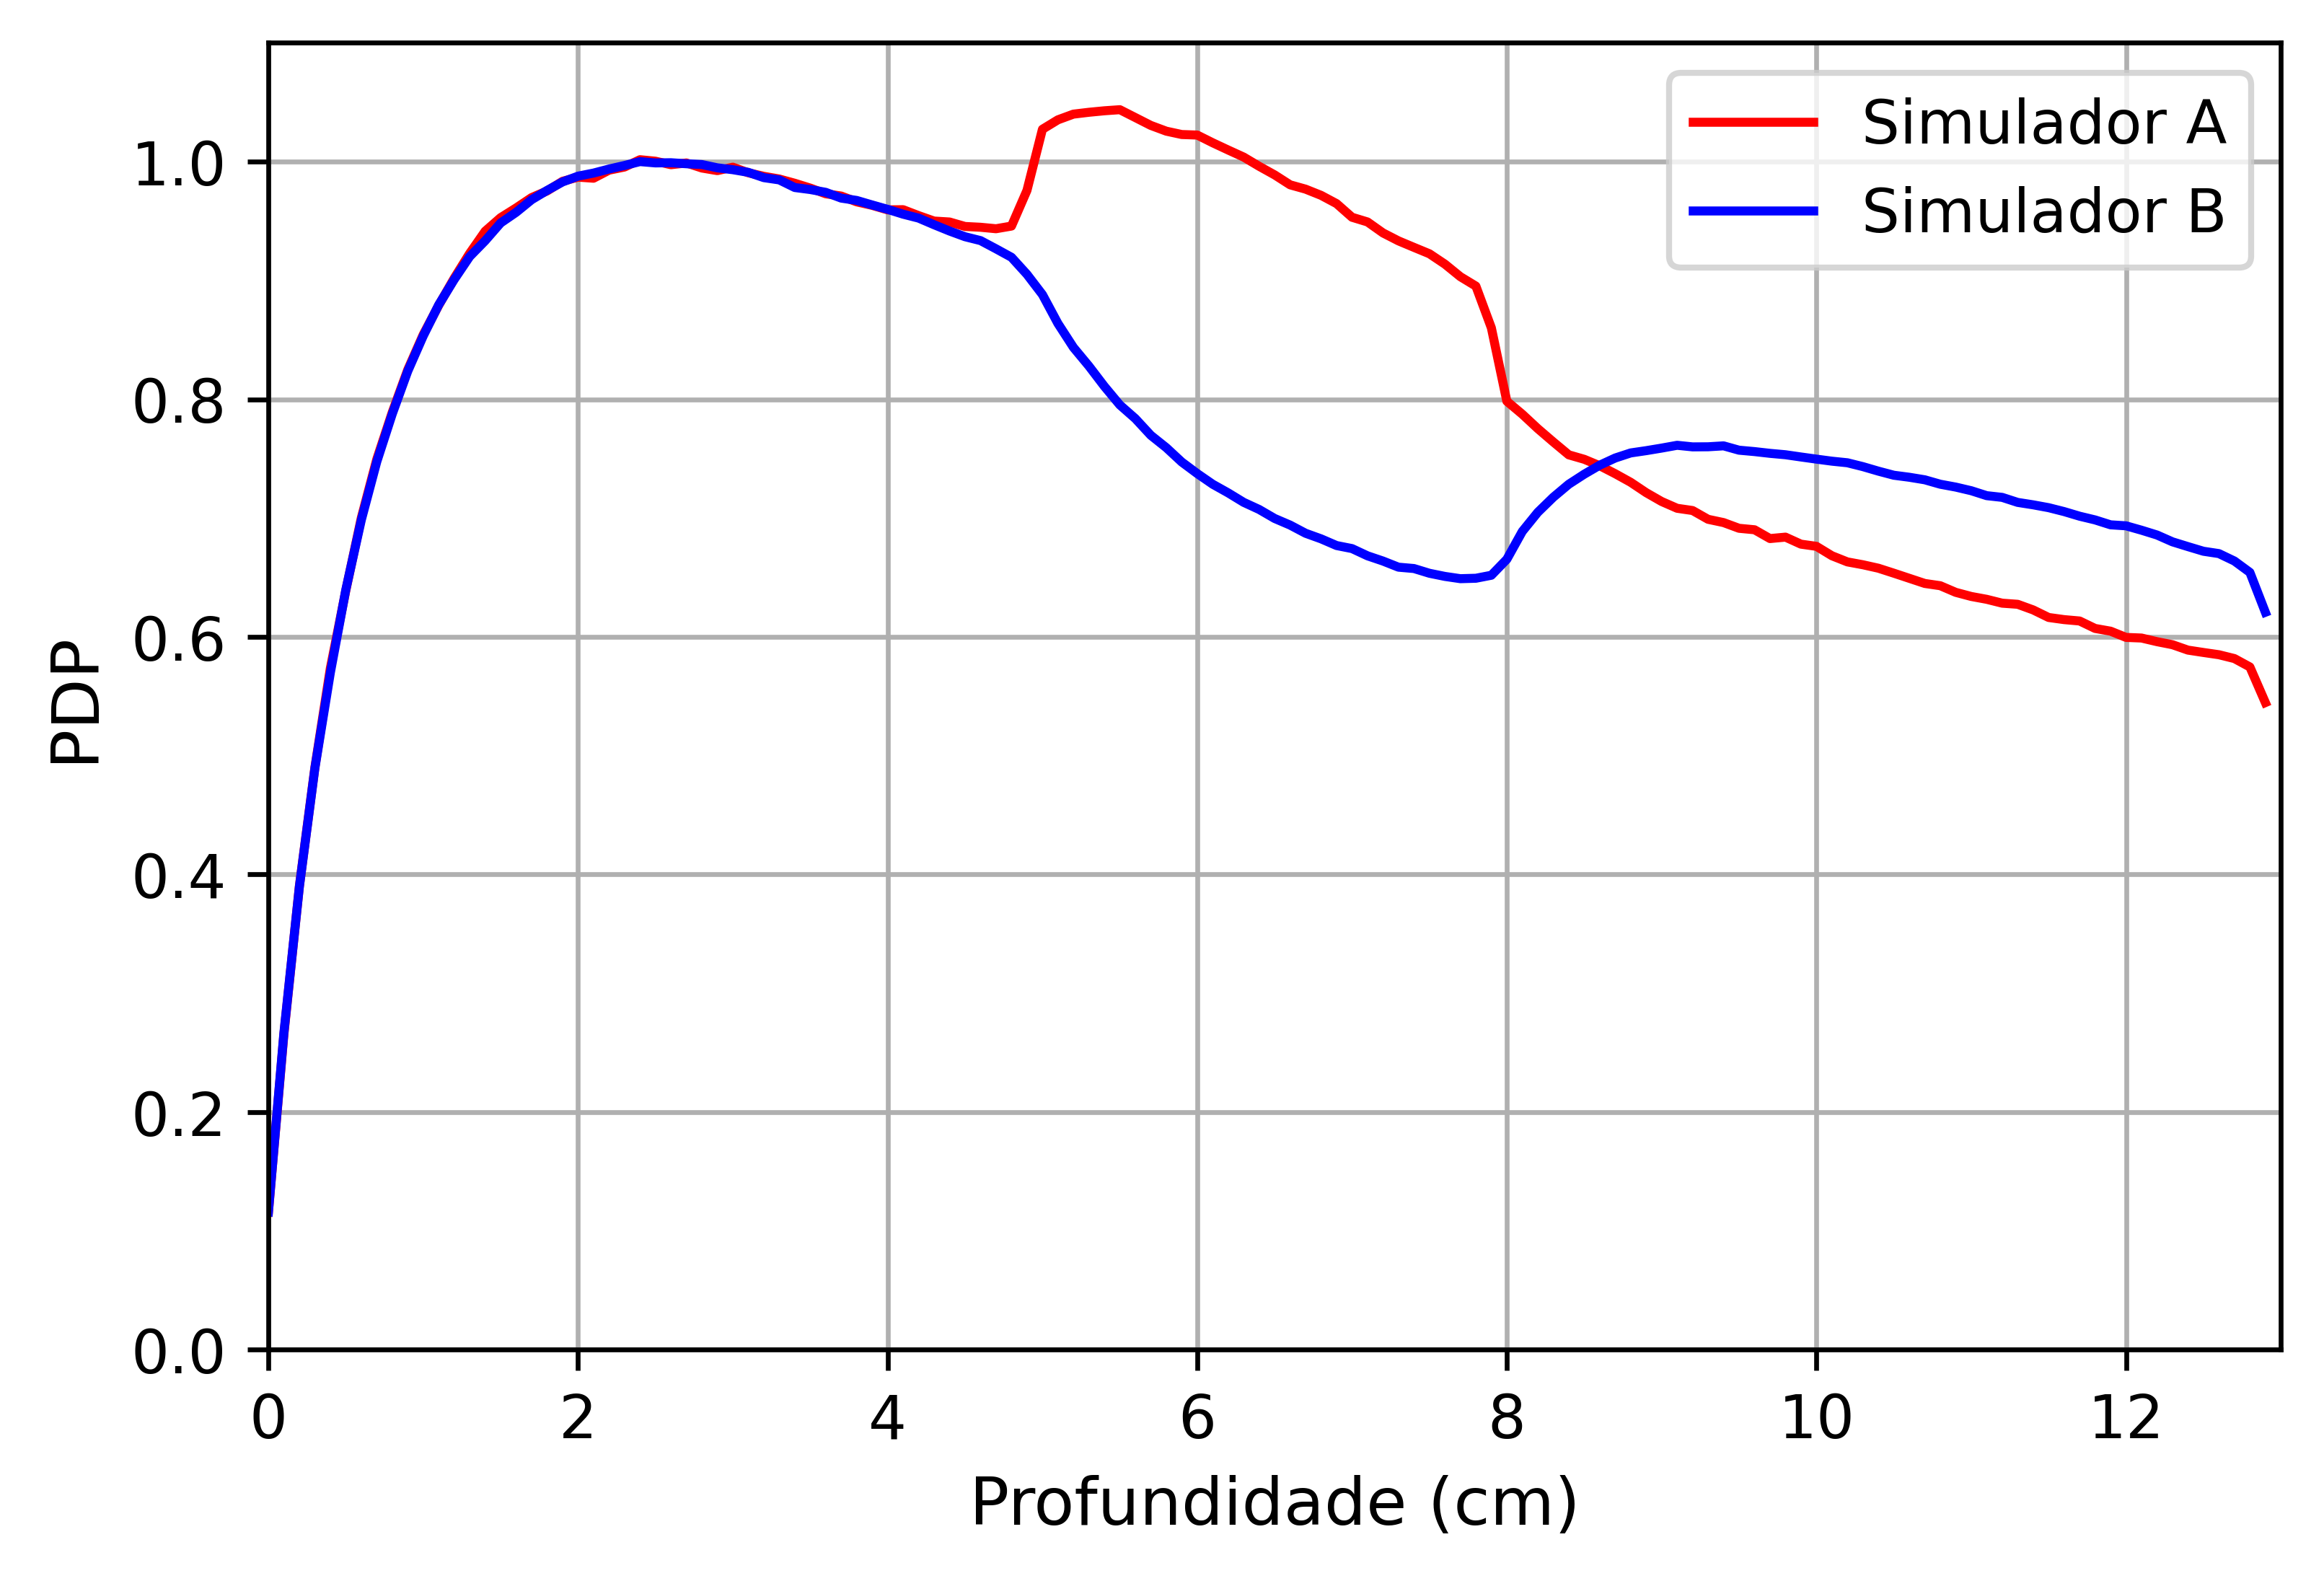

In [17]:
plt.figure(dpi=600)

df = output(outputosso)
dfosso = normalizaosso()
medianaosso = binsosso()
novodf2osso = dataframeosso()

df = output(outputpulmao)
dfpulmao = normalizapulmao()
medianapulmao = binspulmao()
novodf2pulmao = dataframepulmao()

plt.plot((novodf2osso['z']/10), novodf2osso['Dose']/2120, 'r', label = legendaosso) 
plt.plot((novodf2pulmao['z']/10), novodf2pulmao['Dose'], 'b', label = legendapulmao) 

plt.xlabel('Profundidade (cm)', fontsize=11)
plt.ylabel('PDP', fontsize=11)
if particula == 'f':
    plt.xlim(0,13)
if particula == 'e':
    plt.xlim(0,14)
plt.ylim(0,1.1)
plt.legend()
plt.grid()
plt.show()